In [1]:
import sys
from pprint import pprint
pprint(sys.path)
import sys
import os
from pprint import pprint

import pickle
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
import plotly.plotly as py
import plotly.graph_objs as go

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

import pygraphviz

import matplotlib.pyplot as plt

import numpy as np
from numpy import *

from difflib import SequenceMatcher

#from evaluation import EvaluationTaxonomy, Evaluator


['',
 '/Users/hei/anaconda3/lib/python36.zip',
 '/Users/hei/anaconda3/lib/python3.6',
 '/Users/hei/anaconda3/lib/python3.6/lib-dynload',
 '/Users/hei/anaconda3/lib/python3.6/site-packages',
 '/Users/hei/anaconda3/lib/python3.6/site-packages/aeosa',
 '/Users/hei/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/Users/hei/.ipython']


In [2]:
def loadpickleddata(filename):
    with open(filename, "rb") as input_file:
        return pickle.load(input_file)

In [26]:
terms_dir = "../../TExEval-2_testdata_1.2/gs_terms/"
gs_dir = "../../TExEval-2_testdata_1.2/gs_taxo/"
taxo_names = [#"environment_eurovoc_en",
#         "food_en",
#         "food_wordnet_en",
#         "science_en",
         "science_eurovoc_en"
#         "science_wordnet_en"
            ]

# Draw Taxonomy

In [27]:
def drawTaxo(taxo_name):
    G = pickle.load(open('../my_results/subsT_genTaxoRLNG_isaTaxoRLNFD_conNFDcos_NFDthres0_{}_digraph.pickle'.format(taxo_name), 'rb'))
    print (len(G.edges))
    #print (G.nodes)

    pos=graphviz_layout(G,prog='neato',args='')
    #edge_labels = nx.get_edge_attributes(DG,'weight')
    #node_labels = nx.get_node_attributes(DG,'slqs')
    #print (edge_labels)
    plt.figure(1,figsize=(30,30)) 
    nx.draw_networkx_labels(G,pos)#,labels=node_labels)
    #nx.draw_networkx_edge_labels(DG,pos,labels=edge_labels)
    nx.draw(G, node_size=30,alpha=1.0, pos=pos)#, labels = node_labels)

    plt.savefig("../my_results/subsT_genTaxoRLNG_isaTaxoRLNFD_conNFDcos_NFDthres0_{}_digraph.png".format(taxo_name))
    plt.show()

124


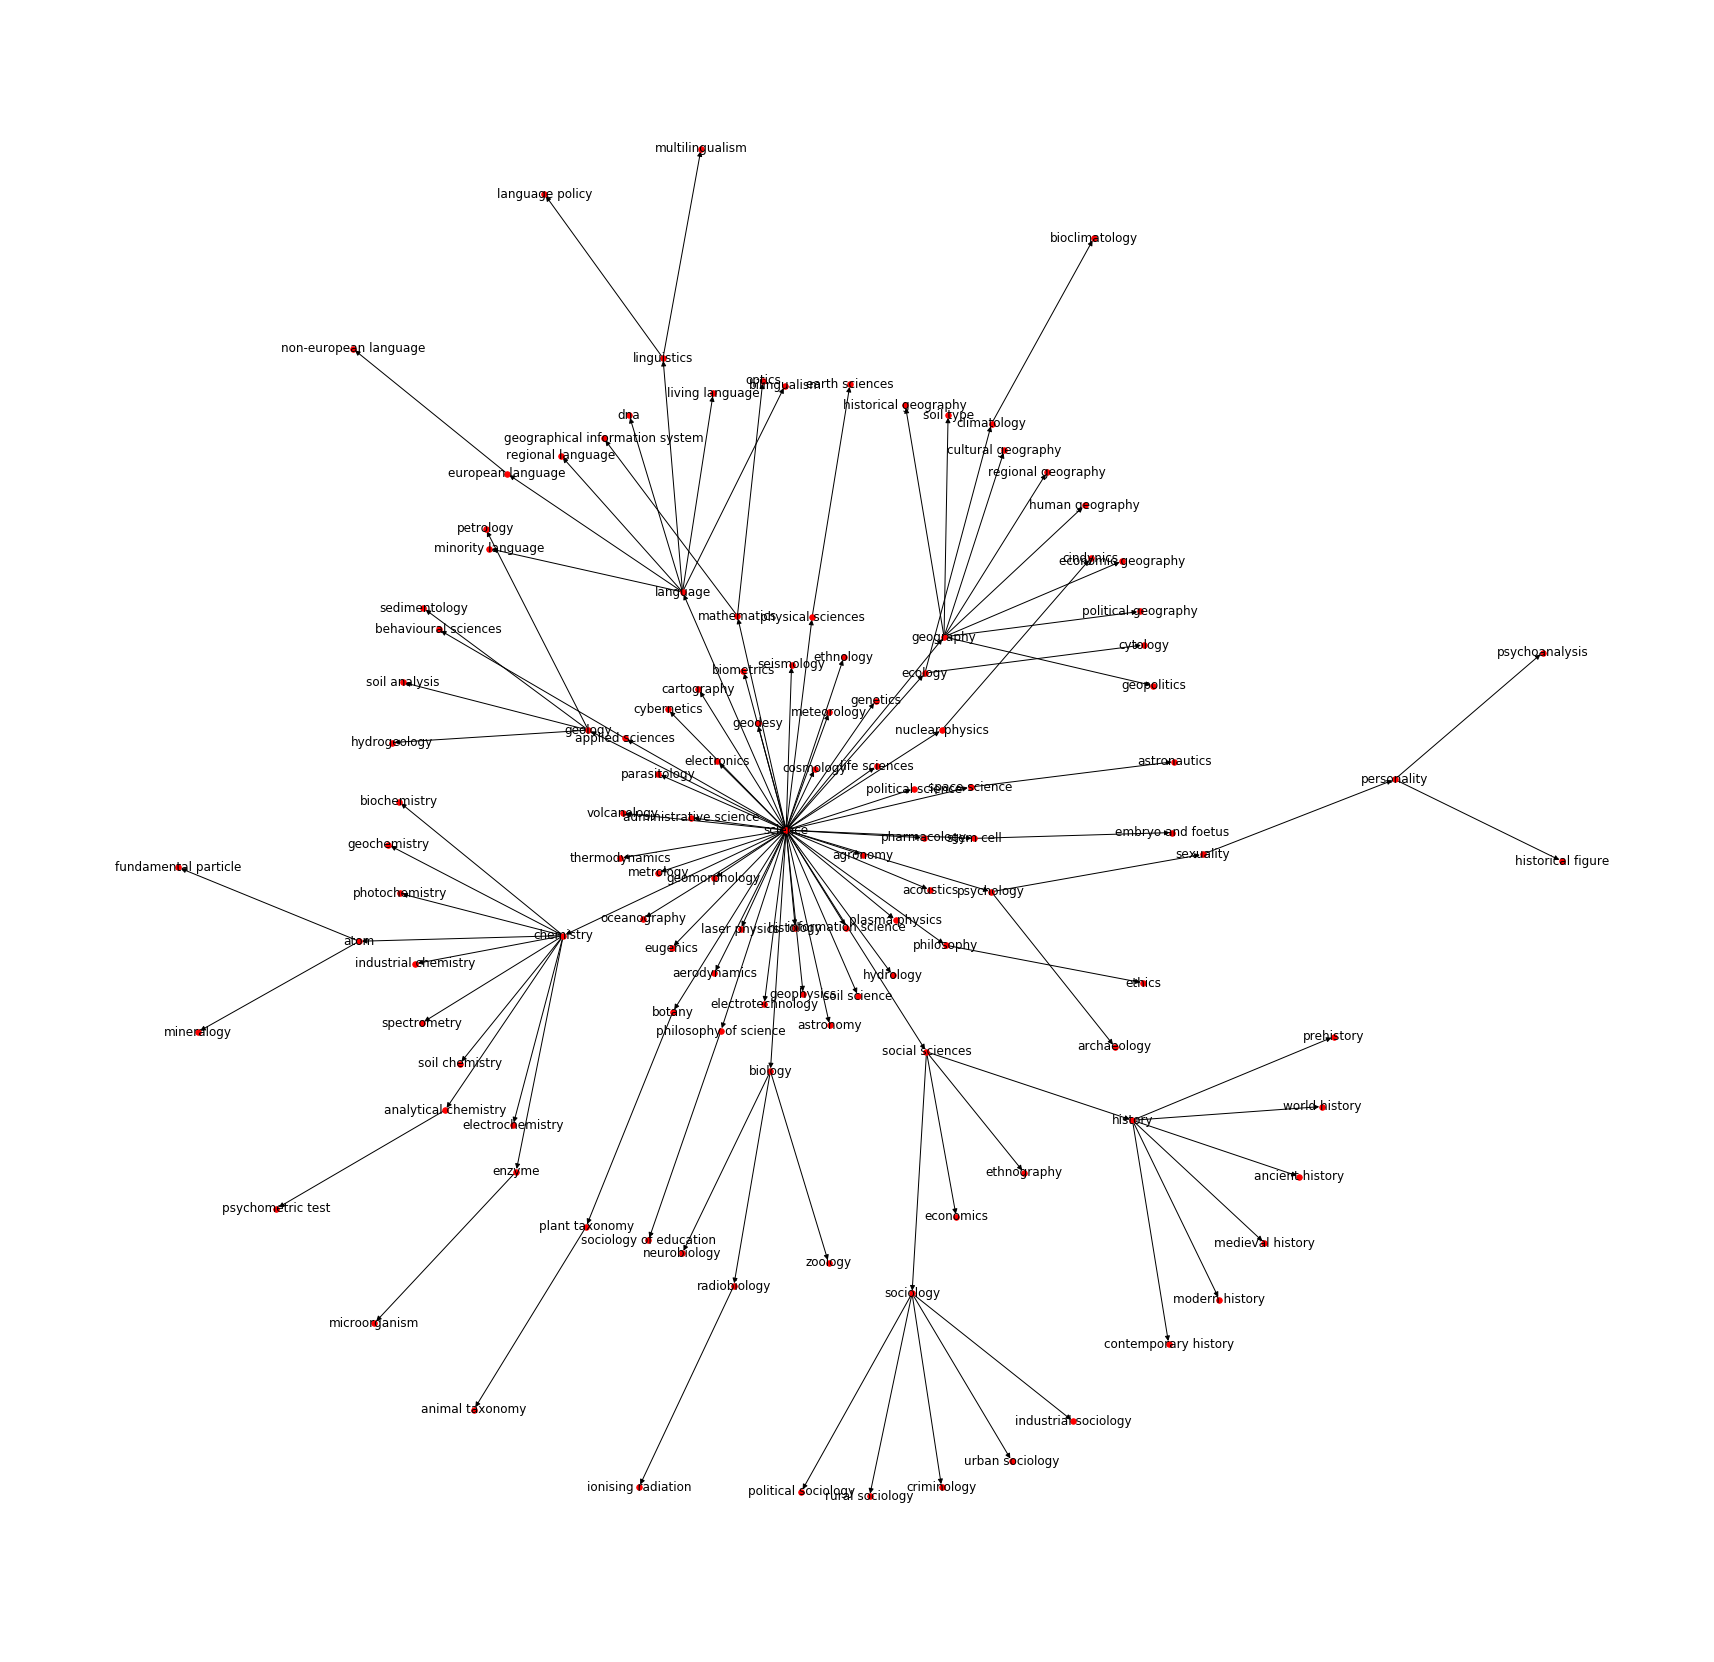

In [28]:
#new
for taxo_name in taxo_names:
    drawTaxo(taxo_name)

260


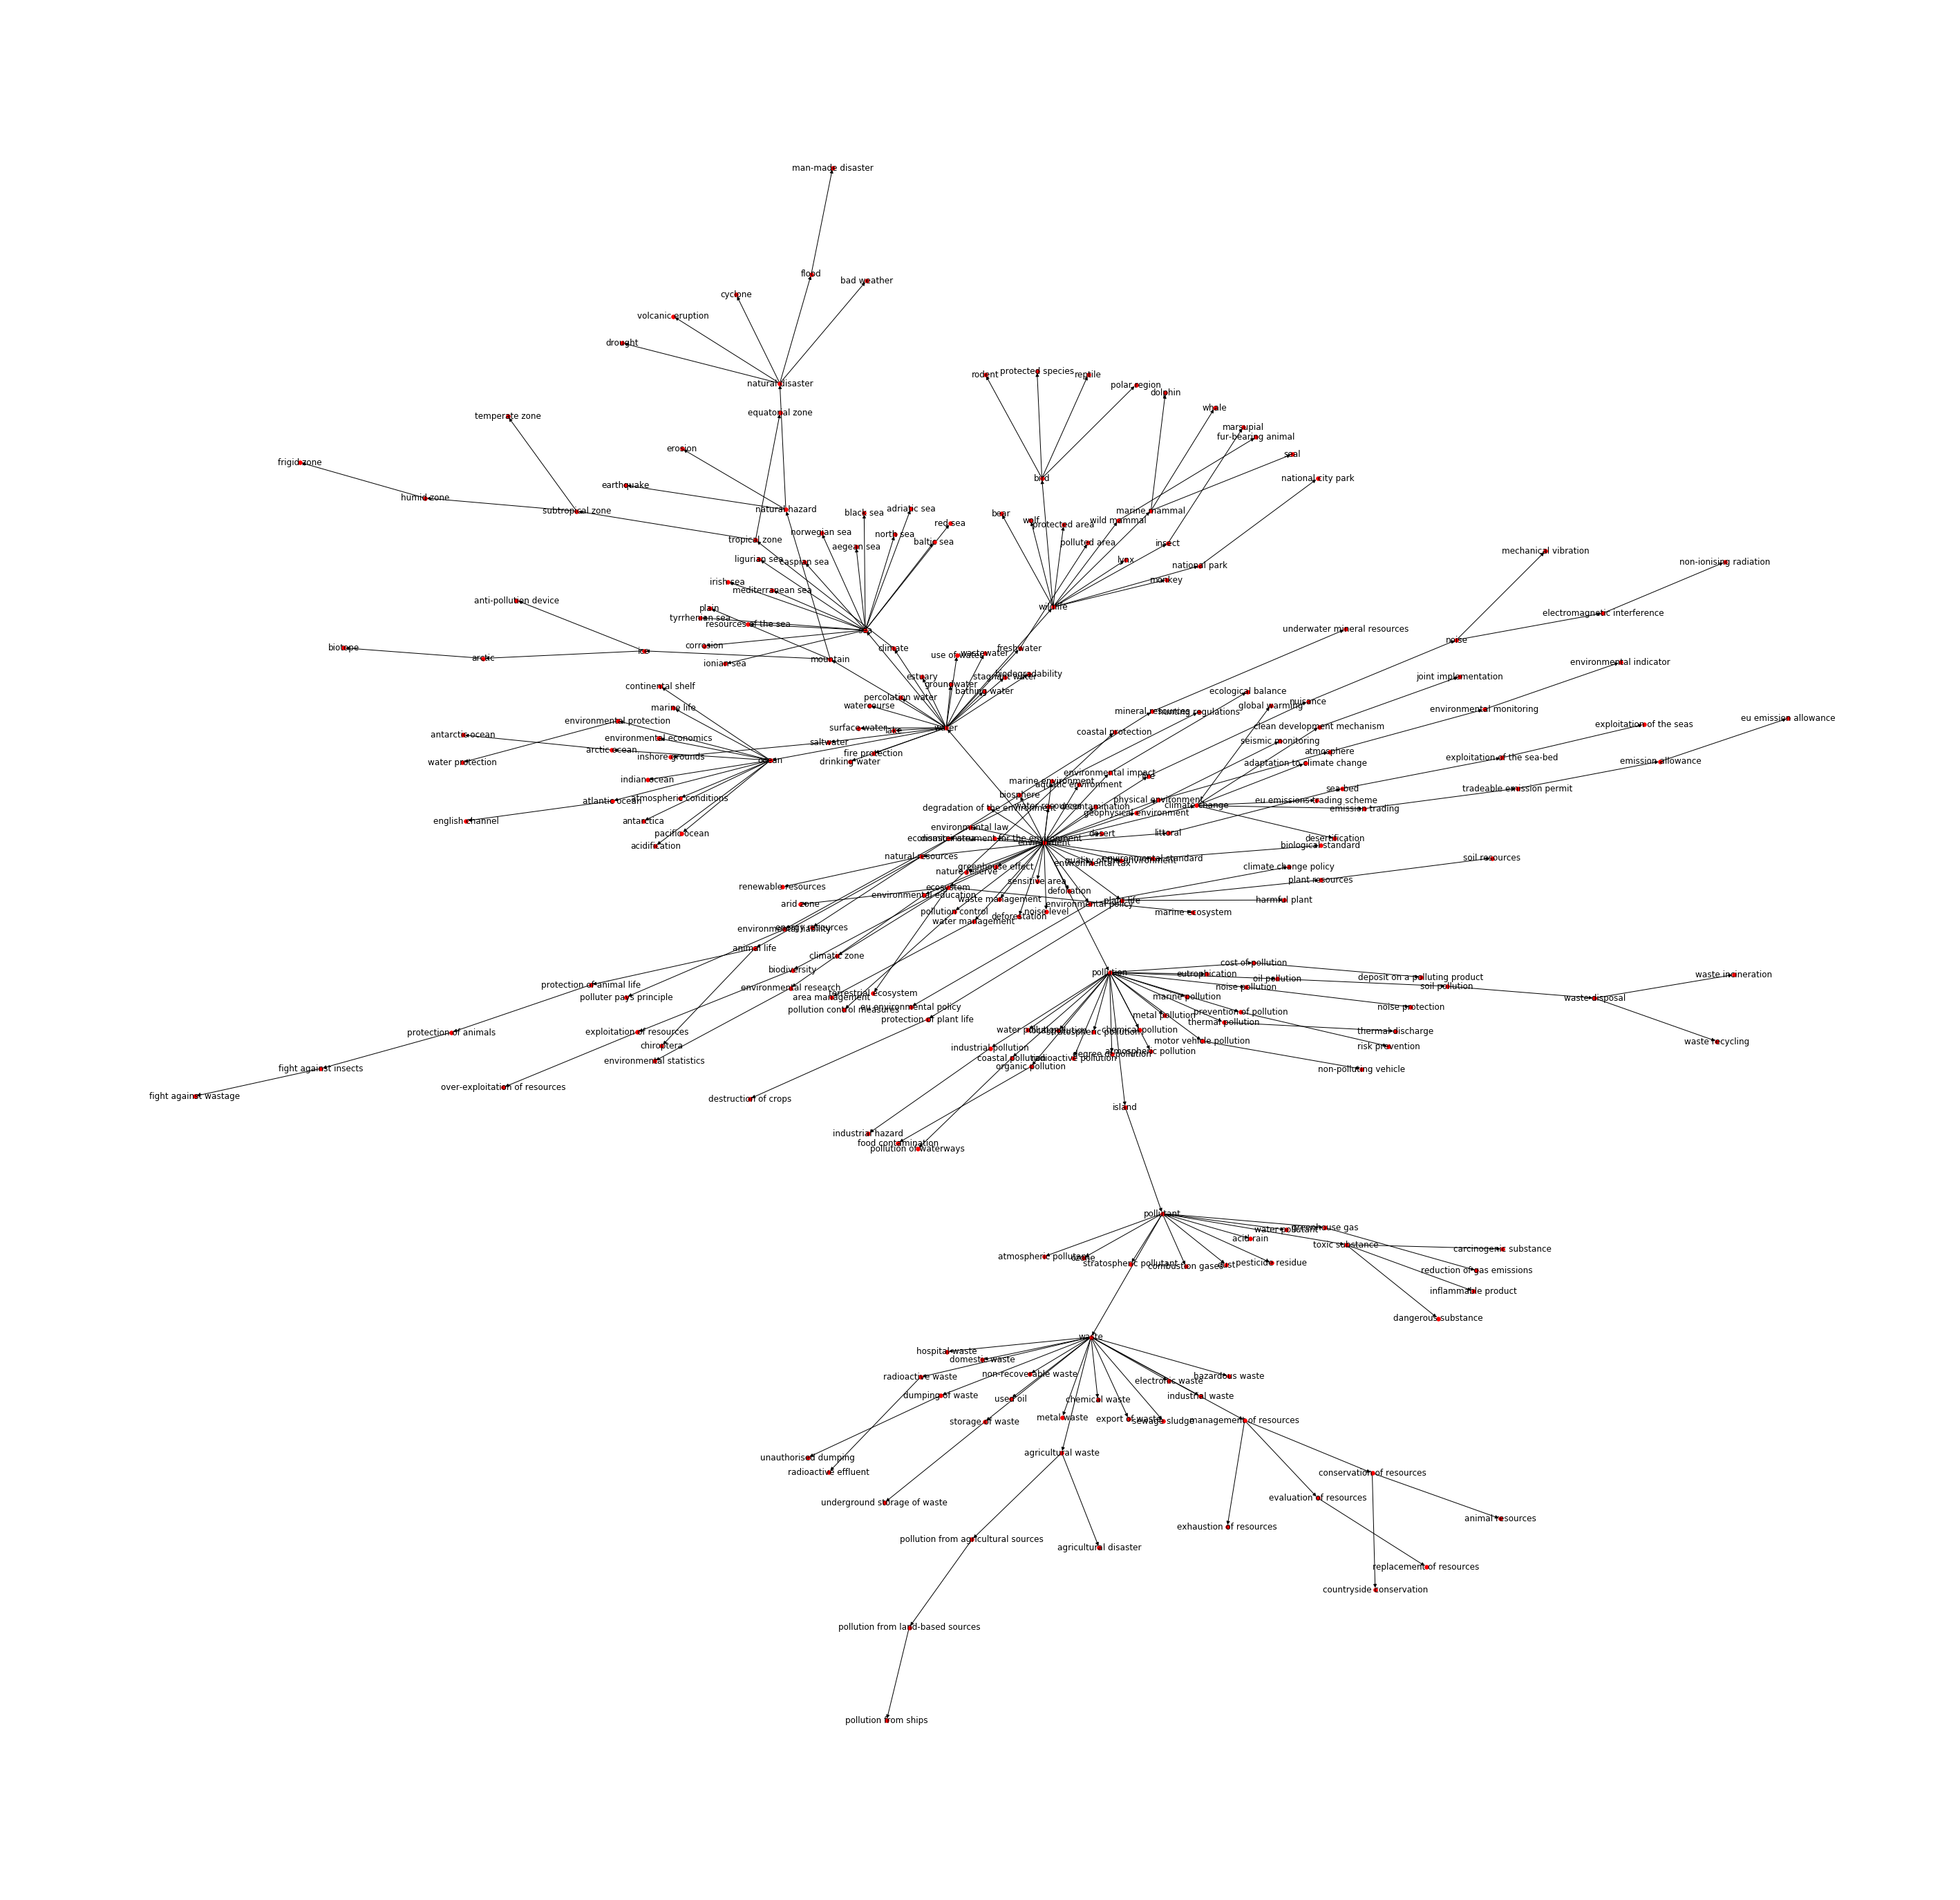

451


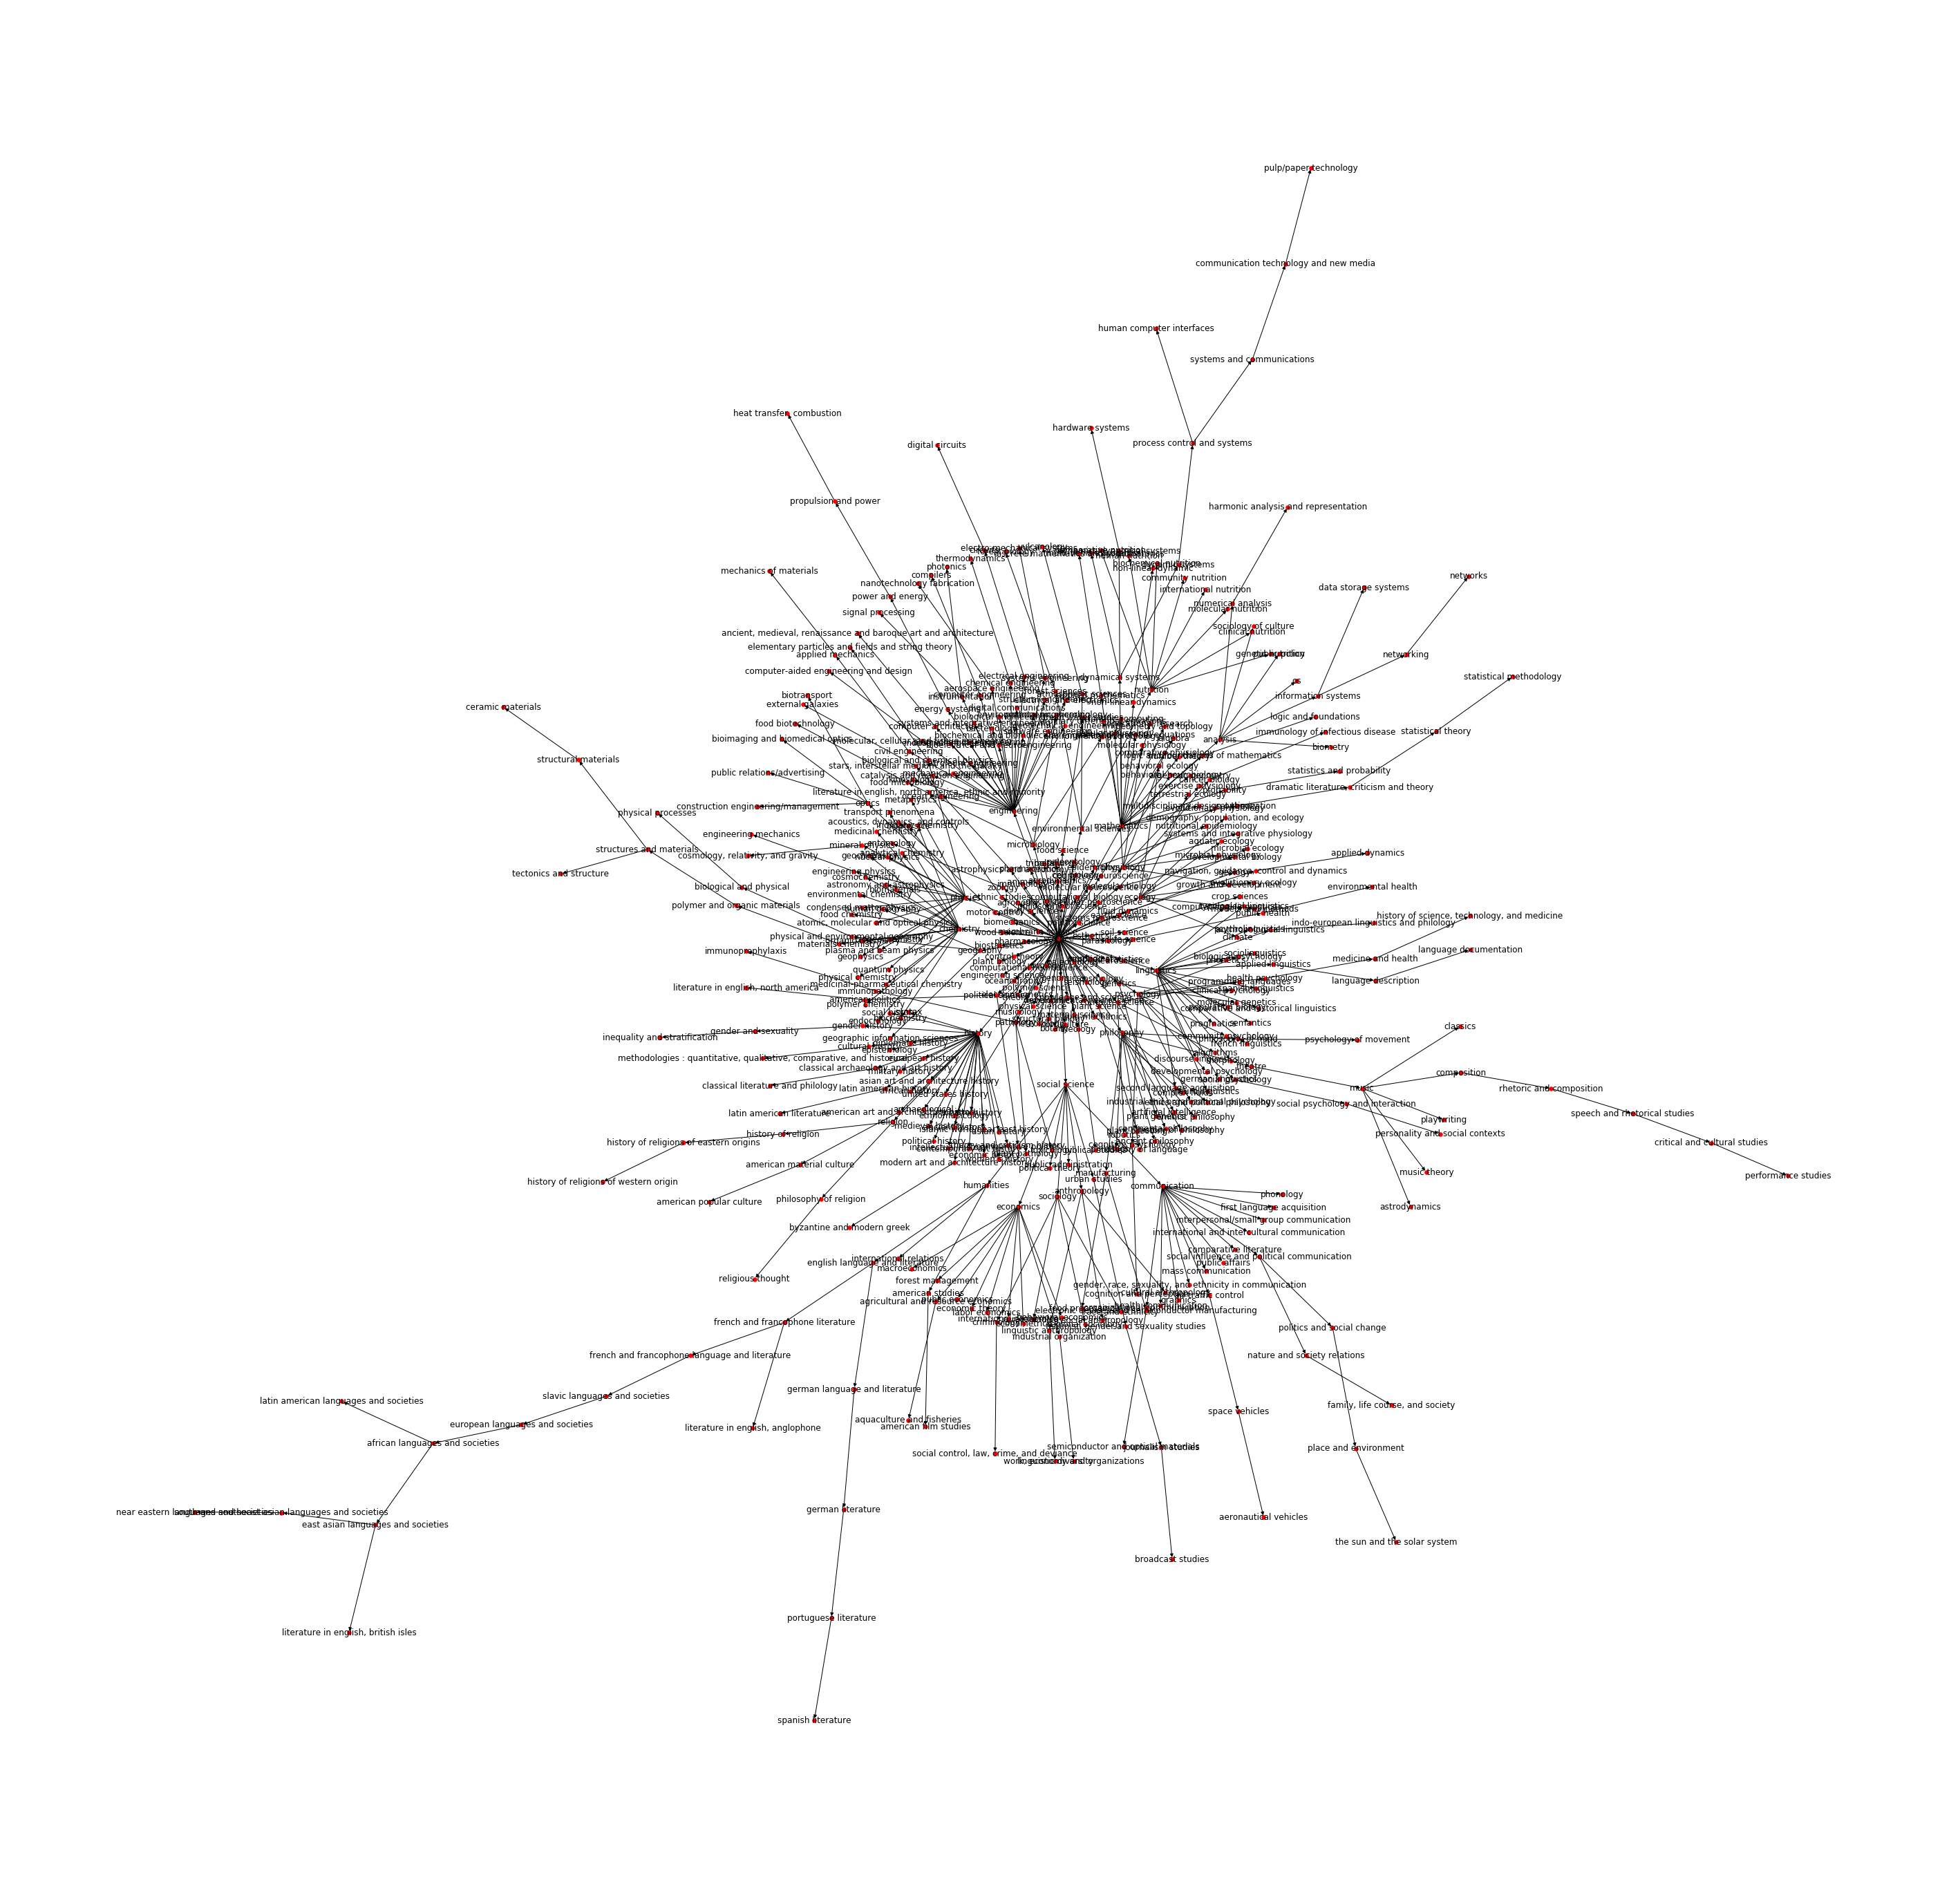

124


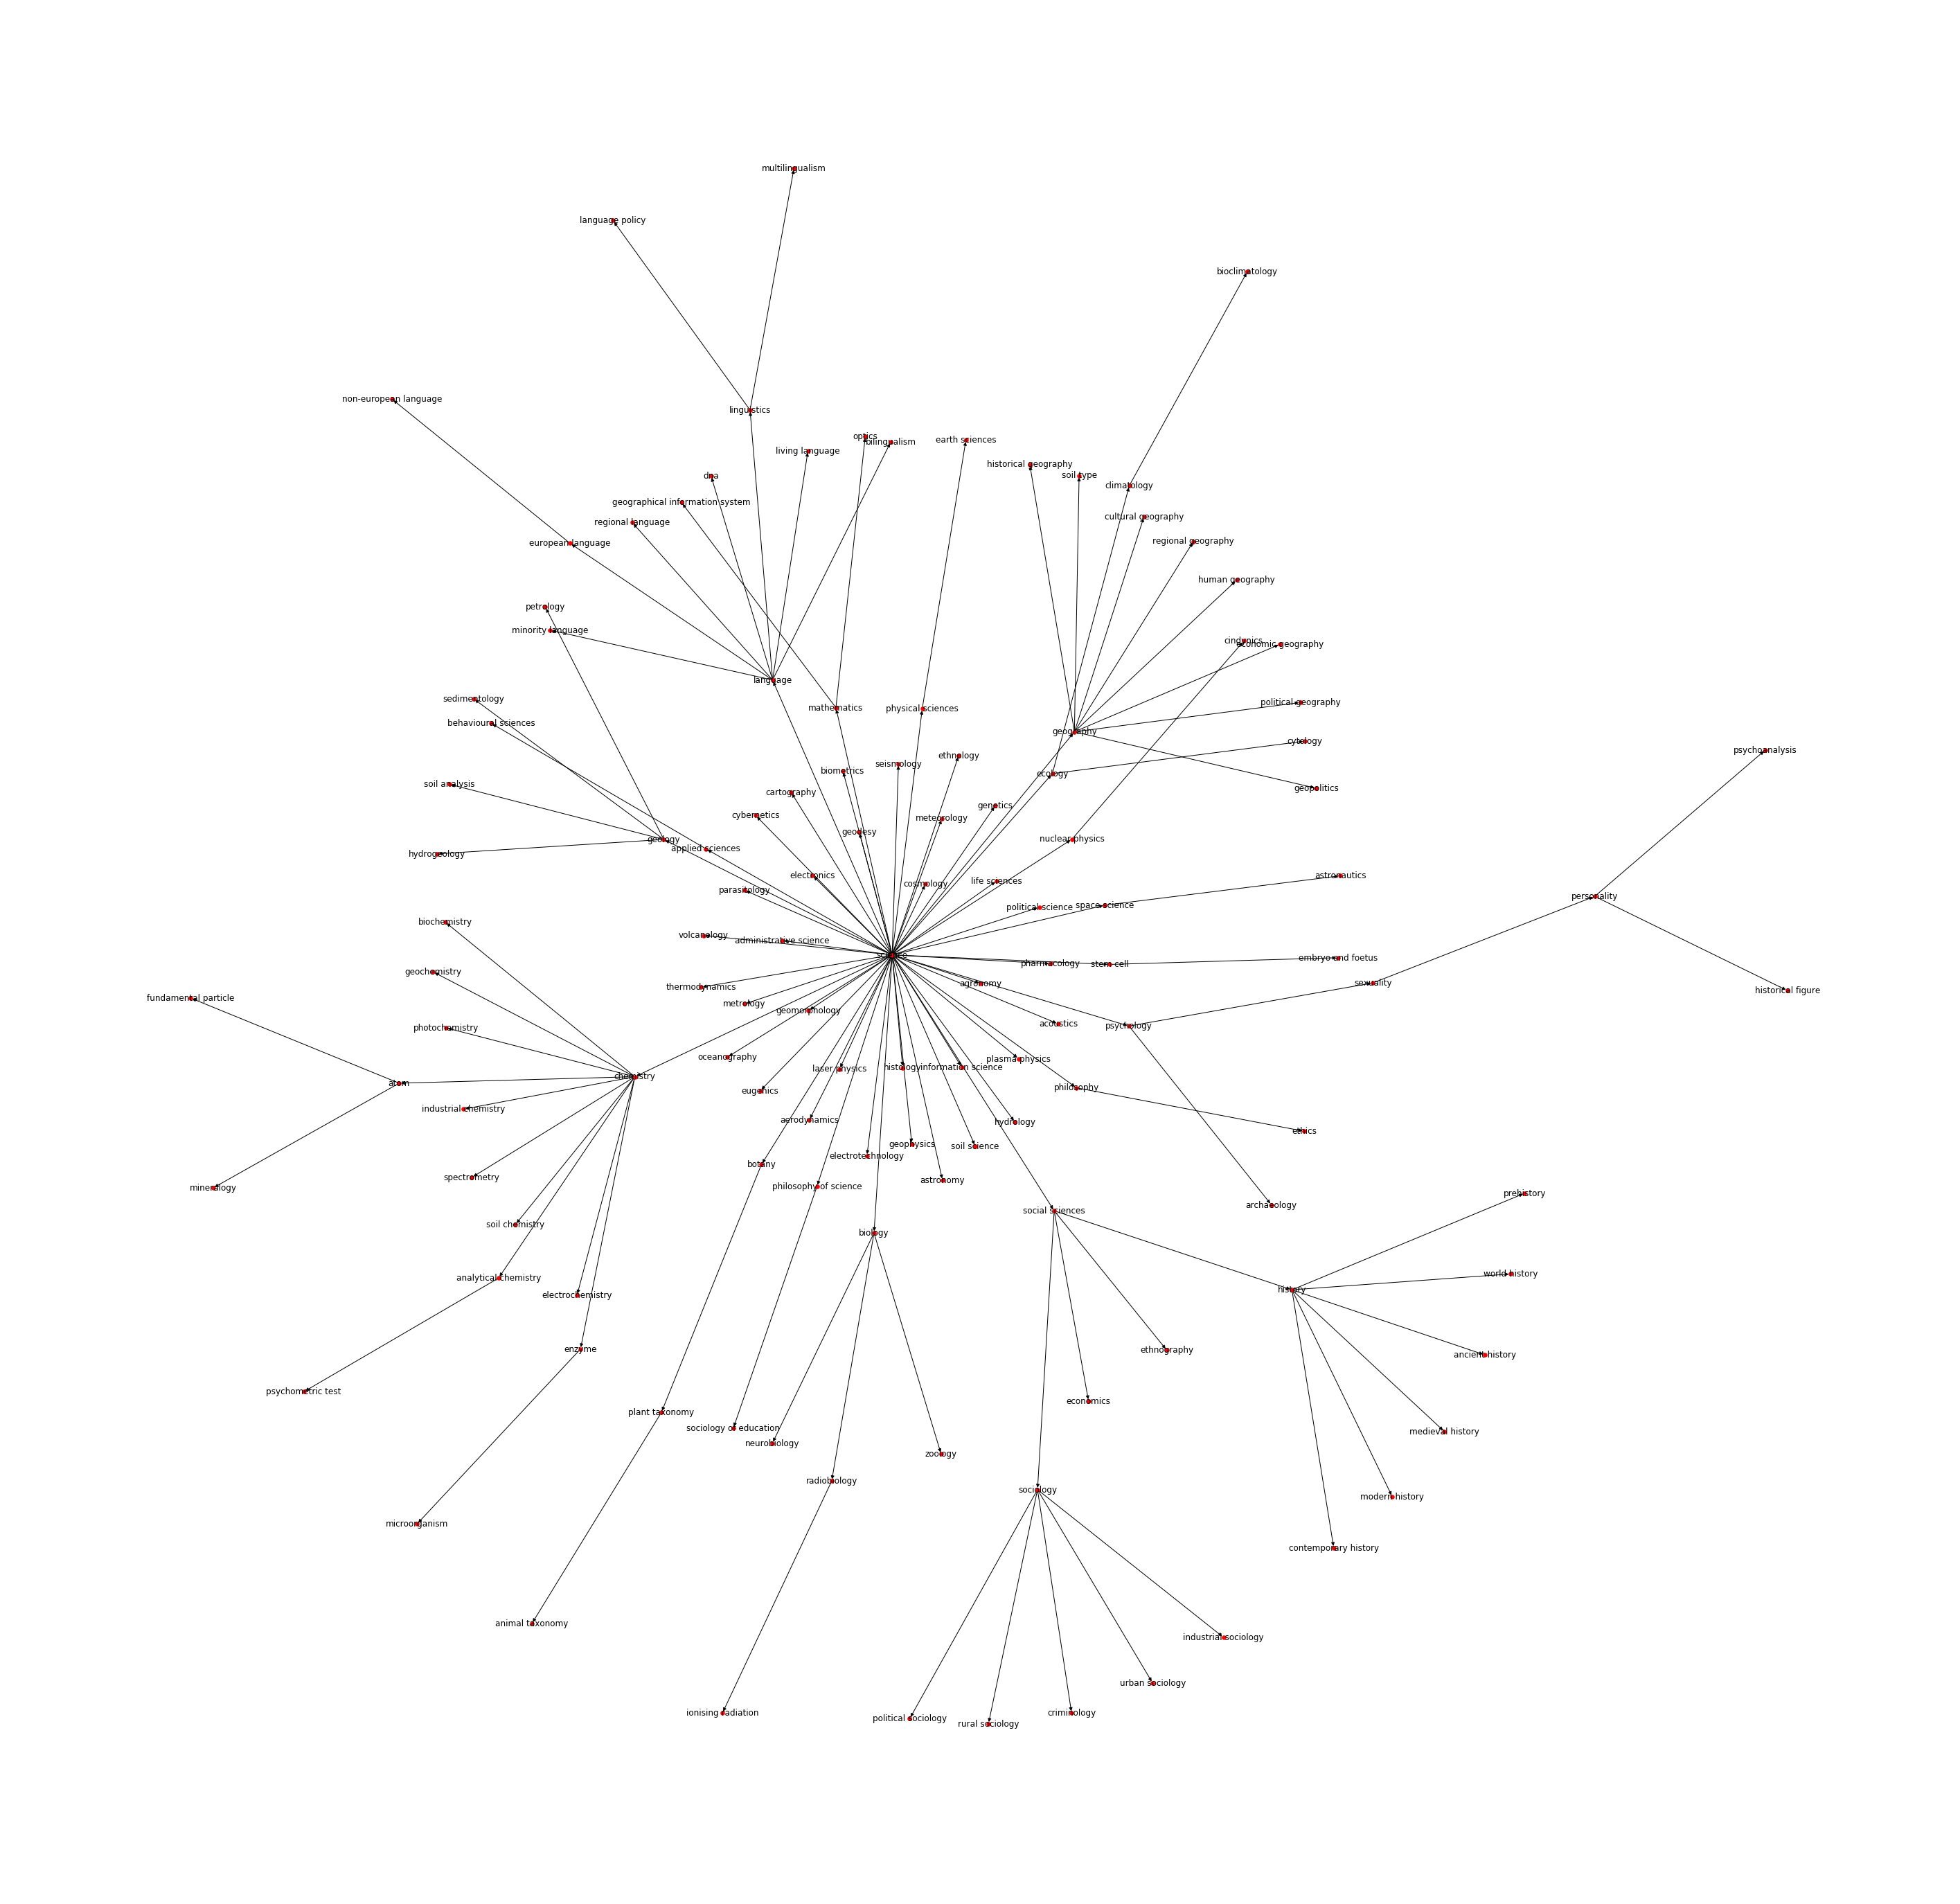

428


In [23]:
for taxo_name in taxo_names:
    drawTaxo(taxo_name)

# Write to .taxo file

In [12]:
def writeTaxo(taxo_name):
    G = pickle.load(open('../my_results/subsT_genTaxoRLNG_isaTaxoRLNFD_conNFDcos_NFDthres0_{}_digraph.pickle'.format(taxo_name), 'rb'))
    edge_cnt = 0
    with open('../my_taxos/my_{}.taxo'.format(taxo_name), 'w') as f:
        for edge in G.edges:
            f.write(str(edge_cnt)+'\t'+edge[1]+'\t'+edge[0]+'\n')
            edge_cnt+=1

In [13]:
for taxo_name in taxo_names:
    writeTaxo(taxo_name)